<a href="https://colab.research.google.com/github/esraasaidmaray/Fraud-Detection-for-financial-transaction-project/blob/main/Project_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Fraud Detection in Financial Transactions

---



---



## Data Collection and Preprocessing

In this phase, we focused on gathering the necessary data and preparing it for analysis and modeling. The following steps were undertaken:

1. **Data Collection**:
   - We collected transaction data that included both fraudulent and non-fraudulent transactions. The dataset comprised various features, such as transaction amount, account balances, transaction type, and timestamps.
   - Data was sourced from https://www.kaggle.com/datasets/ealaxi/paysim1/data, ensuring that it is representative of real-world scenarios.

2. **Data Inspection**:
   - Conducted an initial exploration of the dataset to understand its structure, dimensions, and variable types.
   - Checked for missing values and assessed the distribution of each feature.

3. **Data Cleaning**:
   - Addressed missing values using appropriate imputation techniques. For numerical features, we used mean/mode imputation, while categorical features were filled with the most frequent category.
   - Removed any duplicate records to maintain data integrity.

4. **Feature Engineering**:
   - Created new features, such as `balance_diff_orig` and `balance_diff_dest`, to capture the differences in account balances before and after transactions. This addition aimed to enhance the model's predictive power.

5. **Data Transformation**:
   - Applied one-hot encoding to categorical variables, such as transaction types, to convert them into a numerical format suitable for modeling.
   - Implemented feature scaling for numerical features, such as `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest`, to standardize their ranges and improve model performance.

6. **Data Splitting**:
   - Split the dataset into training and testing subsets to evaluate the performance of our models. Typically, we used a 70-30 or 80-20 split, ensuring that the training set contained a representative distribution of both classes.

By following these steps, we ensured that the data was well-prepared for the subsequent modeling and analysis phases, providing a solid foundation for our fraud detection efforts.


### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import zipfile
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import mlflow
import mlflow.sklearn
from azureml.core import Workspace
from azureml.core import Datastore, Dataset
from azureml.train.automl import AutoMLConfig
from azureml.core.experiment import Experiment
from azureml.core.model import Model
from azureml.core.webservice import AciWebservice, Webservice
from azureml.core.model import InferenceConfig
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies
import os
import json
import requests
from mlflow.models.signature import infer_signature
from sklearn.metrics import accuracy_score

### Installations

In [ ]:
!pip install azureml -sdk


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -s


In [ ]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.6/565.6 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install azureml-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.4/901.4 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.4/617.4 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 k

In [ ]:
!pip install azureml-dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.7/187.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 65.1 MB/s eta 0:00:00


In [ ]:
!pip install azureml.train.automl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.6/249.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 

In [ ]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 87.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
azureml-automl-runtime 1.57.0 requires pandas==1.3.5, but you have pandas 2.2.3 which is incompatible.
azureml-train-automl-runtime 1.57.0 requires pandas==1.3.5, but you have pandas 2.2.3 which is incompatible.
azureml-training-tabular 1.57.0.post1 requires pandas==1.3.5, but you have pandas 2.2.3 which is incompatible.
bigframes 1.21.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
cudf-cu12 24.6.1 requires numba>=0.57, but you have numba 0.56.4 which is incompatible.
cudf-cu12 24.

In [ ]:
!pip install kaggle

### Reading the data

In [ ]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ealaxi/paysim1

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 96% 170M/178M [00:00<00:00, 246MB/s]
100% 178M/178M [00:00<00:00, 258MB/s]


### Unzip the downloaded file

In [ ]:
with zipfile.ZipFile('paysim1.zip', 'r') as zip_ref:
    zip_ref.extractall('paysim1')

In [ ]:
df=pd.read_csv('paysim1/PS_20174392719_1491204439457_log.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


#### Conclusion: Null Values in Dataset

After thoroughly examining the dataset, we can conclude that it does not contain any null values.

#### Summary of Findings:

- **Total Rows**: [6362620]
- **Total Columns**: [11]
- **Null Value Count**: [0]



### One-Hot Encoding of the `type` Column

In this analysis, we applied one-hot encoding to the `type` column of our dataset. This encoding transforms categorical variables into a format that can be provided to machine learning algorithms to improve predictions.

The original `type` column had the following categories:

- `CASH_IN`
- `CASH_OUT`
- `DEBIT`
- `PAYMENT`
- `TRANSFER`

After applying one-hot encoding, the `type` column is represented as five binary columns:

- `type_CASH_IN`
- `type_CASH_OUT`
- `type_DEBIT`
- `type_PAYMENT`
- `type_TRANSFER`

Each of these new columns will contain `1` if the transaction corresponds to that type and `0` otherwise. This transformation allows us to effectively incorporate the categorical data into our machine learning models.


In [ ]:
df=pd.get_dummies(df,columns=['type'])

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,False,True,False


### Feature Scaling of Selected Columns

To ensure that our model performs optimally, we applied feature scaling to normalize the values of selected numerical columns. This process helps to standardize the range of independent variables or features so that each feature contributes equally to the model's performance.

We specifically applied feature scaling to the following columns:

- `amount`
- `oldbalanceOrg`
- `newbalanceOrig`
- `oldbalanceDest`
- `newbalanceDest`

By scaling these features, we ensure that large ranges in the original data do not disproportionately affect the model's learning process. This is particularly important when dealing with algorithms that rely on the distance between data points, such as gradient-based optimization algorithms.


In [ ]:
scaler= StandardScaler()

In [ ]:
features_to_scale=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [ ]:
df[features_to_scale]=scaler.fit_transform(df[features_to_scale])

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0,False,False,False,True,False
1,1,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0,False,False,False,True,False
2,1,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0,False,False,False,False,True
3,1,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0,False,True,False,False,False
4,1,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0,False,False,False,True,False


In [ ]:
df[features_to_scale].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,-4.946736e-17,-1.779646e-17,6.590049e-16,1.498762e-16,-1.340452e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.978545e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01
25%,-2.756812e-01,-2.887164e-01,-2.924417e-01,-3.238139e-01,-3.334114e-01
50%,-1.738653e-01,-2.837972e-01,-2.924417e-01,-2.847734e-01,-2.749863e-01
75%,4.779197e-02,-2.515606e-01,-2.431065e-01,-4.638324e-02,-3.077931e-02
max,1.527936e+02,2.034149e+01,1.666523e+01,1.044120e+02,9.660911e+01


### Feature Engineering: Creating New Features for Balance Differences

To enhance the predictive power of our model, we performed feature engineering by creating new features that capture the differences in balances before and after transactions. This step is important as it may help reveal additional patterns or insights within the data.

We created the following new features:

- **`balance_diff_orig`**: The difference between the original balance before the transaction (`oldbalanceOrg`) and the balance after the transaction (`newbalanceOrig`). This feature is calculated as:

  \[
  \text{balance\_diff\_orig} = \text{oldbalanceOrg} - \text{newbalanceOrig}
  \]

- **`balance_diff_dest`**: The difference between the destination balance before the transaction (`oldbalanceDest`) and the balance after the transaction (`newbalanceDest`). This feature is calculated as:

  \[
  \text{balance\_diff\_dest} = \text{oldbalanceDest} - \text{newbalanceDest}
  \]

By including these new features, we aim to capture potential discrepancies or irregularities in balance changes that may help in detecting fraudulent activities.

In [ ]:
df['balance_diff_orig']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balance_diff_dest']=df['oldbalanceDest']-df['newbalanceDest']
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balance_diff_orig,balance_diff_dest
0,1,-0.281560,C1231006815,-0.229810,-0.237622,M1979787155,-0.323814,-0.333411,0,0,False,False,False,True,False,0.007812,0.009598
1,1,-0.294767,C1666544295,-0.281359,-0.285812,M2044282225,-0.323814,-0.333411,0,0,False,False,False,True,False,0.004453,0.009598
2,1,-0.297555,C1305486145,-0.288654,-0.292442,C553264065,-0.323814,-0.333411,1,0,False,False,False,False,True,0.003788,0.009598
3,1,-0.297555,C840083671,-0.288654,-0.292442,C38997010,-0.317582,-0.333411,1,0,False,True,False,False,False,0.003788,0.015829
4,1,-0.278532,C2048537720,-0.274329,-0.282221,M1230701703,-0.323814,-0.333411,0,0,False,False,False,True,False,0.007892,0.009598


### Using SMOTE to Generate Synthetic Examples for the Minority Class

In our dataset, the number of fraud transactions is significantly lower than the number of normal transactions. To address this imbalance, we applied **SMOTE** (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class (fraud transactions).

> As the fraud transactions are much less than the normal ones, we need to balance the dataset for better model performance.

SMOTE helps to increase the number of fraud cases by generating new, synthetic examples rather than duplicating existing ones. This improves the model's ability to learn from a balanced dataset, making it more effective at detecting fraudulent activity.

In [ ]:
x=df.drop(['isFraud','nameOrig','nameDest'],axis=1)
y=df['isFraud']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
smot=SMOTE(random_state=42)
x_train_sm, y_train_sm=smot.fit_resample(x_train,y_train)

In [ ]:
print(f"After resmapling:{pd.Series(y_train_sm).value_counts()}")

After resmapling:isFraud
0    5083503
1    5083503
Name: count, dtype: int64


In [ ]:
cleaned_data=pd.DataFrame(x_train,columns=df.columns.drop('isFraud'))
cleaned_data['isFraud']=y_train
cleaned_data.to_csv('cleaned_transaction.csv', index=False)

### Exploratory Data Analysis (EDA)

*   Exploratory Data Analysis (EDA) was applied to the dataset to understand its structure, detect patterns, and identify potential relationships between variables. This step is crucial for uncovering insights that can guide feature selection and model development.
*   By applying EDA, we gained valuable insights into the dataset, guiding subsequent steps in feature engineering and model building. The results of EDA ensure that the data is well understood before moving forward with further analysis and modeling.


#### After applying smote class distribution

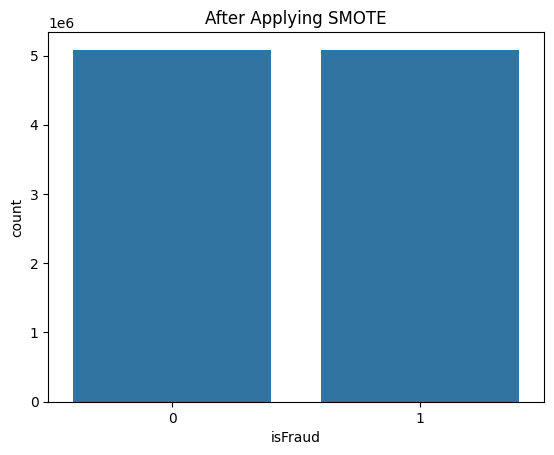

In [ ]:
sns.countplot(x=y_train_sm)
plt.title("After Applying SMOTE")
plt.show()

####Class Distribution of Fraud vs Non-Fraud (logarithmic representation of the original class distribution)

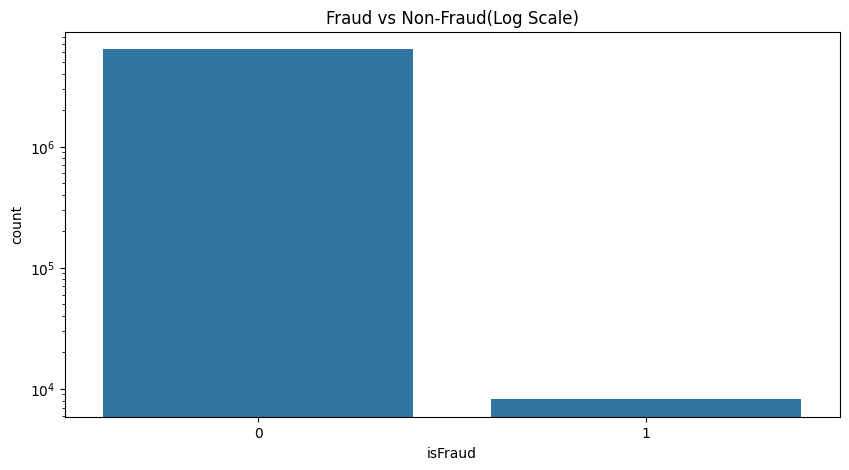

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='isFraud', data=df)
plt.yscale('log')
plt.title("Fraud vs Non-Fraud(Log Scale)")
plt.show()

####Shows high imbalance between fraud and not fraud

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


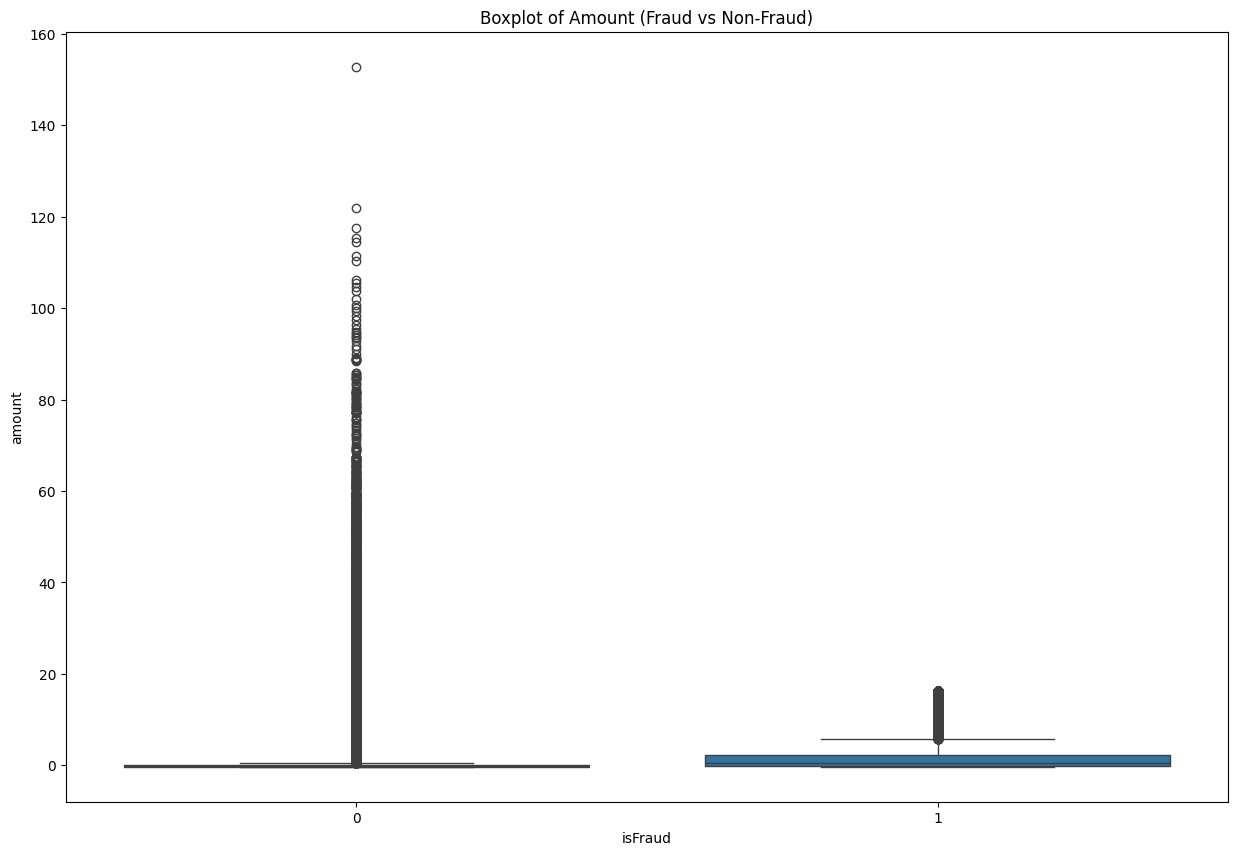

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title("Boxplot of Amount (Fraud vs Non-Fraud)")
plt.show()

####Conclusion: Key Observations

**Non-Fraudulent Transactions (Label 0):**
- Tend to be concentrated around smaller transaction amounts.
- Show a significant number of outliers for larger transaction amounts.

**Fraudulent Transactions (Label 1):**
- Generally involve lower transaction amounts on average compared to non-fraudulent transactions.
- Exhibit fewer extreme outliers.
- Fraudulent activity may be more frequent for smaller transaction amounts.

####Remove extreme outliers and plotting without them

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


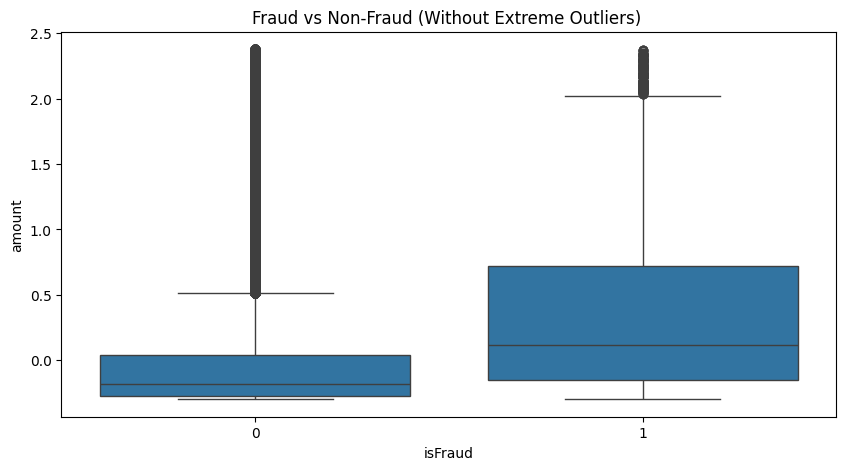

In [ ]:
df_filter=df[df['amount']<df['amount'].quantile(0.99)]
plt.figure(figsize=(10,5))
sns.boxplot(x='isFraud',y='amount',data=df_filter)
plt.title('Fraud vs Non-Fraud (Without Extreme Outliers) ')
plt.show()


## Model Selection: Logistic Regression and Random Forest

To tackle the fraud detection problem, we implemented two models: **Logistic Regression** and **Random Forest**.

1. **Logistic Regression**:
   - We began with Logistic Regression as a baseline model due to its simplicity and interpretability. This model is well-suited for binary classification tasks and allows us to understand the influence of individual features on the likelihood of a transaction being fraudulent.
   - The coefficients obtained from the model provide insights into the importance of various features in predicting fraud.

2. **Random Forest**:
   - To improve predictive accuracy and robustness, we employed the Random Forest model. This ensemble method builds multiple decision trees and aggregates their predictions, which helps mitigate overfitting commonly associated with single decision trees.
   - Random Forest is particularly effective for handling imbalanced datasets, such as in our case, where fraudulent transactions are significantly less frequent than non-fraudulent ones.
   - The model also offers feature importance scores, allowing us to identify the most influential factors contributing to fraud detection.

Both models were evaluated based on their performance metrics, including accuracy, precision, recall, and F1-score. This comparison enabled us to assess their effectiveness in detecting fraudulent transactions and guided us toward selecting the most suitable model for our needs.


In [ ]:
fraud=df[df['isFraud']==1]
not_fraud=df[df['isFraud']==0]

In [ ]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest
count,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.0,8213.000000,8213.000000,8213.000000
mean,368.413856,7.131940,15.239780,1.333667,0.436403,0.957854,1.0,0.001948,13.906113,-0.521451
std,216.388690,12.308552,33.058880,13.626009,3.537954,3.515410,0.0,0.044097,24.224374,1.725312
min,1.000000,-0.383306,-0.132395,0.000000,-0.140722,-0.193057,1.0,0.000000,-0.132395,-13.319958
25%,181.000000,0.267337,1.040062,0.000000,-0.140722,-0.193057,1.0,0.000000,1.036726,-0.253375
50%,367.000000,1.876557,3.958205,0.000000,-0.140722,-0.188851,1.0,0.000000,3.957046,0.052335
75%,558.000000,7.386912,14.010726,0.000000,0.016036,0.759112,1.0,0.000000,13.908444,0.052335
max,743.000000,50.811607,555.101665,343.723741,250.359089,212.707857,1.0,1.000000,211.377924,37.651233


In [ ]:
not_fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff_orig,balance_diff_dest
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0,6.354407e+06,6.354407e+06
mean,2.432357e+02,5.289720e-01,7.628192e+00,5.933590e+00,1.027230e+00,9.085852e-01,0.0,0.0,1.694602e+00,1.186444e-01
std,1.421402e+02,3.052430e+00,2.690341e+01,2.027602e+01,3.604528e+00,3.304061e+00,0.0,0.0,6.675221e+00,8.029457e-01
min,1.000000e+00,-3.833062e-01,-1.323951e-01,0.000000e+00,-1.407216e-01,-1.930566e-01,0.0,0.0,-7.298959e+00,-8.717552e+01
25%,1.560000e+02,-3.148669e-01,-1.323951e-01,0.000000e+00,-1.407216e-01,-1.930566e-01,0.0,0.0,-1.323951e-01,3.075583e-02
50%,2.390000e+02,-9.584712e-04,-1.295250e-03,0.000000e+00,6.427480e-04,1.980917e-04,0.0,0.0,-8.536537e-02,5.233499e-02
75%,3.340000e+02,6.834153e-01,8.643838e-01,1.003274e+00,8.604532e-01,8.070028e-01,0.0,0.0,3.222564e-01,1.716214e-01
max,7.180000e+02,4.728907e+02,4.081869e+02,3.028358e+02,3.773800e+02,3.201382e+02,0.0,0.0,1.053511e+02,5.746894e+01


### Logistic Regression Model


In [ ]:
sm_Log_model=LogisticRegression(max_iter=1000)
sm_Log_model.fit(x_train_sm,y_train_sm)
Log_pred=sm_Log_model.predict(x_test)
print("Logistic Regression Results:")
print(classification_report(y_test,Log_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270904
           1       0.03      0.94      0.06      1620

    accuracy                           0.96   1272524
   macro avg       0.52      0.95      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524



In [ ]:
Log_model=LogisticRegression(max_iter=1000)
Log_model.fit(x_train,y_train)
Log_pred=Log_model.predict(x_test)
print("Logistic Regression Results:")
print(classification_report(y_test,Log_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.45      0.60      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.72      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524



### Random Forest Model

In [ ]:
RF_model=RandomForestClassifier(n_estimators=100)
RF_model.fit(x_train,y_train)
RF_pred=RF_model.predict(x_test)
print("RandomForestClassifier Results:")
print(classification_report(y_test,RF_pred))

RandomForestClassifier Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.81      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
sm_RF_model=RandomForestClassifier(n_estimators=100)
sm_RF_model.fit(x_train_sm,y_train_sm)
RF_pred=sm_RF_model.predict(x_test)
print("RandomForestClassifier Results:")
print(classification_report(y_test,RF_pred))

###Saving performance metrics

In [ ]:
metrics_Log_model=classification_report(y_test,Log_pred,output_dict=True)
metrics_RF_model=classification_report(y_test,RF_pred, output_dict=True)

###Convert to DataFrame for reporting

In [ ]:
metrics_Log_model_df=pd.DataFrame(metrics_Log_model).transpose()
metrics_RF_model_df=pd.DataFrame(metrics_RF_model).transpose()

In [ ]:
metrics_Log_model_df.to_csv('metrics_Log_model_Performance.csv', index=True)
metrics_RF_model_df.to_csv('metrics_RF_model_Performance.csv', index=True)

In [ ]:
import joblib
joblib.dump(Log_model,'Log_model.joblib')
joblib.dump(RF_model,'RF_model.joblib')

['RF_model.joblib']

###Testing the models

In [ ]:
import pickle
with open('Log_model.pkl','wb') as file:
    pickle.dump(Log_model, file)

with open('RF_model.pkl','wb') as file:
    pickle.dump(RF_model, file)

In [ ]:
loaded_log_model=pickle.load(open("Log_model.pkl",'rb'))

In [ ]:
print(loaded_log_model.feature_names_in_)

['step' 'amount' 'oldbalanceOrg' 'newbalanceOrig' 'oldbalanceDest'
 'newbalanceDest' 'isFlaggedFraud' 'type_CASH_IN' 'type_CASH_OUT'
 'type_DEBIT' 'type_PAYMENT' 'type_TRANSFER' 'balance_diff_orig'
 'balance_diff_dest']


In [ ]:
input_data = json.dumps({
    "data":[[1,0.5,50000.0,0.0,0.0,50000.0,-50000.0,500.0,0,0,0,0,1,0]]
})
parsed_data=json.loads(input_data)['data']
input_df=pd.DataFrame(parsed_data, columns=['step', 'amount' ,'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest'
 ,'newbalanceDest', 'isFlaggedFraud' ,'type_CASH_IN', 'type_CASH_OUT'
 ,'type_DEBIT' ,'type_PAYMENT' ,'type_TRANSFER', 'balance_diff_orig'
 ,'balance_diff_dest'])
input_df['type_CASH_IN']=0
input_df['type_CASH_OUT']=0
input_df['type_DEBIT']=0
input_df['type_PAYMENT']=0
input_df['type_TRANSFER']=1
print(input_df)
predection=loaded_log_model.predict(input_df)
print("prediction is",predection)
if (predection[0]==0):
  print("the transaction is not fraud")
else :
  print("the transaction is fraud")

   step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     0.5        50000.0             0.0             0.0   

   newbalanceDest  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0         50000.0        -50000.0             0              0           0   

   type_PAYMENT  type_TRANSFER  balance_diff_orig  balance_diff_dest  
0             0              1                  1                  0  
prediction is [1]
the transaction is fraud


In [ ]:
log_pred=loaded_log_model.predict(x_test)
accuracy=accuracy_score(y_test,log_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.93%


In [ ]:
loaded_RF_model=pickle.load(open("RF_model.pkl",'rb'))

In [ ]:
print(loaded_RF_model.feature_names_in_)

['step' 'amount' 'oldbalanceOrg' 'newbalanceOrig' 'oldbalanceDest'
 'newbalanceDest' 'isFlaggedFraud' 'type_CASH_IN' 'type_CASH_OUT'
 'type_DEBIT' 'type_PAYMENT' 'type_TRANSFER' 'balance_diff_orig'
 'balance_diff_dest']


In [ ]:
input_data=json.dumps({
    "data":[[1, 0.5, 1000.0, 800.0, 2000.0, 2200.0, -200.0, 500.0, 0, 0, 0, 0, 1, 0]]
})
parsed_data=json.loads(input_data)['data']
input_df=pd.DataFrame(parsed_data, columns=['step', 'amount' ,'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest'
 ,'newbalanceDest', 'isFlaggedFraud' ,'type_CASH_IN', 'type_CASH_OUT'
 ,'type_DEBIT' ,'type_PAYMENT' ,'type_TRANSFER', 'balance_diff_orig'
 ,'balance_diff_dest'])
input_df['type_CASH_IN']=0
input_df['type_CASH_OUT']=0
input_df['type_DEBIT']=0
input_df['type_PAYMENT']=0
input_df['type_TRANSFER']=1
print(input_df)
predection=loaded_RF_model.predict(input_df)
print("prediction is" ,predection)
if (predection[0]==0):
  print("the transaction is not fraud")
else :
  print("the transaction is fraud")

   step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     0.5         1000.0           800.0          2000.0   

   newbalanceDest  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0          2200.0          -200.0             0              0           0   

   type_PAYMENT  type_TRANSFER  balance_diff_orig  balance_diff_dest  
0             0              1                  1                  0  
prediction is [0]
the transaction is not fraud


In [ ]:
rf_pred=loaded_RF_model.predict(x_test)
accuracy=accuracy_score(y_test,rf_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.88%


In [ ]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test,log_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test,rf_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.48      0.63      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.74      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.04      0.07      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.52      0.53   1272524
weighted avg       1.00      1.00      1.00   1272524



# MLflow Logging (for MLOps)
In our fraud detection project, we utilized **MLflow** to log and track our machine learning experiments systematically. Below is a summary of the key actions performed during the MLflow logging process:

1. **Starting the MLflow Run**:
   - We initiated an MLflow run using `mlflow.start_run()` to begin logging parameters, metrics, and models.

2. **Logging Parameters**:
   - We logged the parameter `n_estimators` with a value of `100` for our Random Forest model, providing insight into the model configuration used during training.


In [ ]:
mlflow.start_run()

<ActiveRun: >

In [ ]:
mlflow.log_param("n_estimators",100)
mlflow.sklearn.log_model(RF_model,"random_forest_model")
mlflow.sklearn.log_model(Log_model,"logistic_regression_model")

2024/10/09 13:24:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/09 13:24:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
mlflow.log_metric("accuracy_RF_model",accuracy_score(y_test,Log_pred))
mlflow.log_metric("accuracy_Log_model",accuracy_score(y_test,RF_pred))

In [ ]:
mlflow.end_run()

#  Advanced Techniques and Azure Integration
In our fraud detection project, we leveraged advanced techniques and integrated Azure services to enhance model deployment and management. Below are the key components of this integration:



### Initializing workspace

In [ ]:
work_space=Workspace.create(name='deploy-fraud-final-workspace',
                      subscription_id='3b6040c4-0174-439e-82be-075d49ed51e0',
                      resource_group='deploy-fraud-final-group',
                      location='eastus')
print("created successfully")

Deploying StorageAccount with name deployfrstoragec00e4ca8d.
Deploying KeyVault with name deployfrkeyvault8833feb9.
Deploying AppInsights with name deployfrinsights949a272d.
Deployed AppInsights with name deployfrinsights949a272d. Took 1.84 seconds.
Deploying Workspace with name deploy-fraud-final-workspace.
Deployed StorageAccount with name deployfrstoragec00e4ca8d. Took 21.92 seconds.
Deployed KeyVault with name deployfrkeyvault8833feb9. Took 22.79 seconds.
Deployed Workspace with name deploy-fraud-final-workspace. Took 19.75 seconds.
created successfully


In [ ]:
LOG_model_path='/content/Log_model.pkl'
Rf_model_path='/content/RF_model.pkl'

In [ ]:
LOG_model_name='Log_pred_model'
Rf_model_name='RF_pred_model'

In [ ]:
logreg_model=Model.register(workspace=work_space,model_name=LOG_model_name,model_path=LOG_model_path)

rf_model=Model.register(workspace=work_space,model_name=Rf_model_name,model_path=Rf_model_path)


Registering model Log_pred_model
Registering model RF_pred_model


In [ ]:
environment=Environment('my-new-env')
environment.python.conda_dependencies=CondaDependencies.create(conda_packages=['scikit-learn','pandas'])

In [ ]:
inference_config=InferenceConfig(entry_script="/content/score.py", environment=environment)

In [ ]:
aci_config=AciWebservice.deploy_configuration(cpu_cores=1,memory_gb=1, auth_enabled=True)

In [ ]:
service=Model.deploy(workspace=work_space,
                       name="deplpoy-fraud-final-service",
                       models=[logreg_model,rf_model],
                       inference_config=inference_config,
                       deployment_config=aci_config)
service.wait_for_deployment(show_output=True)

<ipython-input-169-9d06eb1398de>:1: FutureWarning: azureml.core.model:
To leverage new model deployment capabilities, AzureML recommends using CLI/SDK v2 to deploy models as online endpoint, 
please refer to respective documentations 
https://docs.microsoft.com/azure/machine-learning/how-to-deploy-managed-online-endpoints /
https://docs.microsoft.com/azure/machine-learning/how-to-attach-kubernetes-anywhere 
For more information on migration, see https://aka.ms/acimoemigration 
To disable CLI/SDK v1 deprecation warning set AZUREML_LOG_DEPRECATION_WARNING_ENABLED to 'False'
  service=Model.deploy(workspace=work_space,


Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2024-10-09 07:13:47+00:00 Creating Container Registry if not exists..
2024-10-09 07:23:47+00:00 Registering the environment..
2024-10-09 07:23:49+00:00 Building image..
2024-10-09 07:32:03+00:00 Generating deployment configuration.
2024-10-09 07:32:06+00:00 Submitting deployment to compute..
2024-10-09 07:32:10+00:00 Checking the status of deployment deplpoy-fraud-final-service..
2024-10-09 07:33:27+00:00 Checking the status of inference endpoint deplpoy-fraud-final-service.
Succeeded
ACI service creation operation finished, operation "Succeeded"


In [ ]:
scoring_uri=service.scoring_uri
print(f"Service deployed at: {scoring_uri}")

Service deployed at: http://c6d61eae-c937-4e25-8705-10bb4f721bbd.eastus.azurecontainer.io/score


In [ ]:
cleaned_data.to_csv('/content/cleaned_transaction.csv',index=False)

In [ ]:
datastore=work_space.get_default_datastore()
datastore.upload_files(files=['/content/cleaned_transaction.csv'],target_path='fraud_detection_data/',overwrite=True)
dataset=Dataset.Tabular.from_delimited_files(path=(datastore,'fraud_detection_data/cleaned_transaction.csv'))

Uploading an estimated of 1 files
Uploading /content/cleaned_transaction.csv
Uploaded /content/cleaned_transaction.csv, 1 files out of an estimated total of 1
Uploaded 1 files


In [ ]:
print(dataset.take(5).to_pandas_dataframe())

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}
   step    amount nameOrig  oldbalanceOrg  newbalanceOrig nameDest  \
0   619  0.342006     None       1.328035        1.436652     None   
1   164  0.053981     None      -0.207478       -0.139539     None   
2   382 -0.264788     None      -0.287458       -0.292442     None   
3   180  0.575888     None      -0.226320       -0.292442     None   
4    36  0.043398     None      -0.288716       -0.292442     None   

   oldbalanceDest  newbalanceDest  isFlaggedFraud  type_CASH_IN  \
0       -0.174944       -0.300846           False          True   
1       -0.086687       -0.171855           False          True   
2       -0.323814       -0.333411           False         False   
3       -0.296702       -0.164726           False         False   
4        0.303248        0.302811           False         False   

   type_C

###Testing azure deployment

In [ ]:
primary_key,secondary_key=service.get_keys()
print(f"Primary Key: {primary_key}")
print(f"Secondary Key: {secondary_key}")
#Primary Key: 1j6MY06IVgJddMKxM81DseEvHuivHqSB
#Secondary Key: 8hqCkUvLSQaI1OyBy0JnTaJn7Dyqk5NW


In [ ]:
scoring_uri=" http://c6d61eae-c937-4e25-8705-10bb4f721bbd.eastus.azurecontainer.io/score"

In [ ]:
input_data=json.dumps({
    "data":[[1,0.5,5000.0,4500.0,500.0,1000.0,-500.0,500.0,0,0,0,0,1,0]]
})

headers={
    'Content-Type': 'application/json',
    "Authorization": f"Bearer {'6jaT5wqSOBtf4zD8dyjCV9yXBu3EWHvg'}"
}

response=requests.post(scoring_uri,data=input_data,headers=headers)
if response.status_code==200:
    try:
        parsed_result=json.loads(response.text)
        if isinstance(parsed_result,str):
            result=json.loads(parsed_result)
        else:
            result=parsed_result
        print(f"Response JSON: {result}")

        logreg_prediction=result["logistic_regression_prediction"][0]
        rf_prediction=result["random_forest_prediction"][0]

        print(f"Logistic Regression Prediction: {logreg_prediction}")
        print(f"Random Forest Prediction: {rf_prediction}")

        if logreg_prediction==0 and rf_prediction==0:
            print("Both models (Logestic regression and Random forest) predict the transaction as not fraud.")
        elif logreg_prediction==1 :
            print("Logestic regression model predicts the transaction as fraud.")
        elif rf_prediction==1:
          print("Random forest model predicts the transaction as fraud.")

    except json.decoder.JSONDecodeError:
        print("failed to decode, the resopnse is:")
        print(response.text)
else:
    print(f"Error: {response.status_code},{response.text}")

Response JSON: {'logistic_regression_prediction': [0], 'random_forest_prediction': [0]}
Logistic Regression Prediction: 0
Random Forest Prediction: 0
Both models (Logestic regression and Random forest) predict the transaction as not fraud.


# GANS

In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Tanh()
        )
    def forward(self, x):
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.fc(x)



In [ ]:
generator=Generator(input_size=100,hidden_size=128,output_size=x_train.shape[1])
discriminator=Discriminator(input_size=x_train.shape[1],hidden_size=128)


In [ ]:
x_train_numeric=pd.get_dummies(x_train)
x_train_array=x_train_numeric.to_numpy()
x_train_array=x_train_array.astype(np.float32)
x_train_tensor=torch.tensor(x_train_array,dtype=torch.float32)
dataset=TensorDataset(x_train_tensor)
batch_size=64
data_loader=DataLoader(dataset,batch_size=batch_size,shuffle=True)
data_loader

In [ ]:
for real_data in data_loader:
    if isinstance(real_data, list) or isinstance(real_data, tuple):
        real_data=real_data[0]

    if isinstance(real_data, list):
        real_data=torch.tensor(real_data)

    current_batch_size=real_data.size(0)

    # Create real and fake labels
    real_labels=torch.ones(current_batch_size,1)
    fake_labels=torch.zeros(current_batch_size,1)

    # Continue with your training loop
    real_data=real_data.view(current_batch_size, -1).float()
    real_output=discriminator(real_data)
    d_loss_real=criterion(real_output, real_labels)

    z=torch.randn(current_batch_size, latent_dim)
    fake_data=generator(z)

    fake_output=discriminator(fake_data.detach())
    d_loss_fake=criterion(fake_output, fake_labels)

    d_loss=d_loss_real+d_loss_fake
    d_loss.backward()
    optimizer_D.step()
